<a href="https://colab.research.google.com/github/omerkucukacar/bby261FinalProjesi/blob/master/bby261FinalProjesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#okunacak kütüphanaler
from keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt





In [0]:
mnist = mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
trainX = X_train.reshape((X_train.shape[0], 28, 28, 1))
testX = X_test.reshape((X_test.shape[0], 28, 28, 1))
trainX = trainX/255
testX = testX/255

In [0]:
# El yazısının tahmin edileceği rakamlar
el_yazisi = [
               '0', 
              '1', 
               '2',
               '3', 
              '4',
               '5',
               '6', 
               '7',
               '8', 
               '9']



               

In [42]:
X_train.shape


(60000, 28, 28)

In [43]:
len(y_train)

60000

In [44]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [45]:
X_test.shape

(10000, 28, 28)

In [46]:
len(y_test)

10000

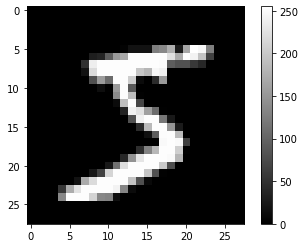

In [47]:
import matplotlib.pyplot as plt


plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.grid(False)
plt.show()

# El yazısı Şeklinde Grafiği göster
plt.show()


In [0]:
X_train = X_train / 255.0

X_test = X_test / 255.0

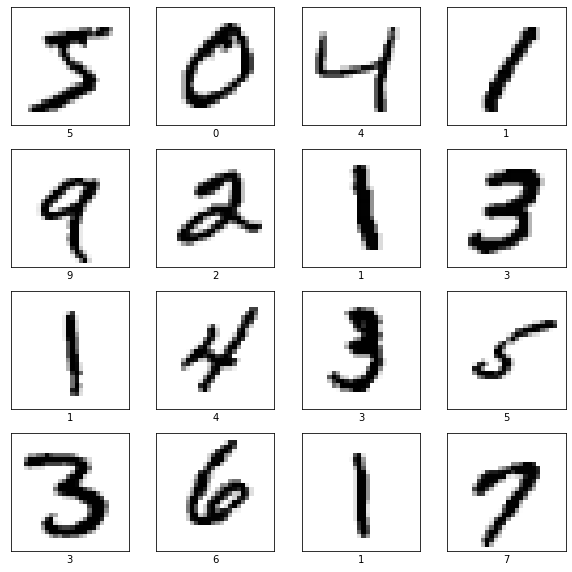

In [49]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(el_yazisi[y_train[i]])
plt.show()

In [0]:
trainY =(y_train,10)
testY = (y_test,10)

In [0]:
benimmodelim= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [0]:
benimmodelim.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [53]:
benimmodelim.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [54]:
benimmodelim.fit(X_train, y_train, epochs=10 )


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2599 - acc: 0.9244
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1147 - acc: 0.9660
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0788 - acc: 0.9762
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0585 - acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0452 - acc: 0.9862
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0349 - acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0290 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0226 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0188 - acc: 0.9942
Epoch 10/10
60000/60000 [==============================] - 

In [55]:
Test_kayiplari, test_sonuc = benimmodelim.evaluate(X_test,  y_test, verbose=2)

print('Test sonucu doğruluğu=', test_sonuc)

10000/10000 - 0s - loss: 0.0860 - acc: 0.9770
Test sonucu doğruluğu= 0.977


In [56]:
y_test[0]

7

In [0]:
sonuc_tahmin = benimmodelim.predict(X_test)

In [58]:
sonuc_tahmin[0]

array([1.2953293e-10, 9.9939150e-09, 1.9499915e-09, 1.2023916e-08,
       2.6050241e-14, 5.1909147e-11, 2.8967203e-16, 1.0000000e+00,
       4.9359516e-09, 1.4945693e-08], dtype=float32)

In [59]:
np.argmax(sonuc_tahmin[0])

7

In [60]:
y_test[0]

7

In [0]:
def plot_image(i, sonuc_tahmin_array, true_label, img):
  sonuc_tahmin_array, true_label, img = sonuc_tahmin_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(sonuc_tahmin_array)
  if predicted_label == true_label:
    color = 'brown'
  else:
    color = 'orange'

  plt.xlabel("{} {:2.0f}% ({})".format(el_yazisi[predicted_label],
                                100*np.max(sonuc_tahmin_array),
                               el_yazisi[true_label]),
                                color=color)

def plot_value_array(i, sonuc_tahmin_array, true_label):
 sonuc_tahmin_array, true_label = sonuc_tahmin_array, true_label[i]
  
  

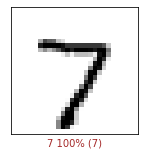

In [62]:

i = 0
plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
plot_image(i, sonuc_tahmin[i], y_test, X_test)



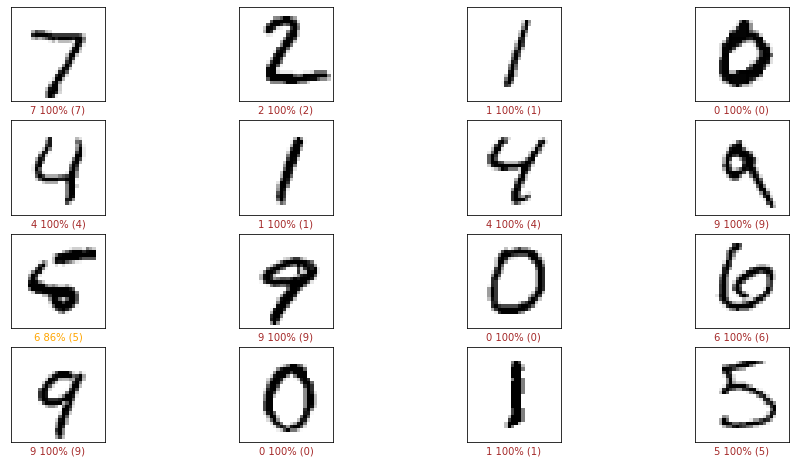

In [63]:


# İlk X test görüntüsünü, tahmin edilen etiketlerini ve gerçek etiketleri çizin.
# Mavi renkte doğru tahminler ve kırmızıda yanlış tahminler.
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, sonuc_tahmin[i], y_test, X_test)
  
 


In [64]:

# Test veri kümesinden bir görüntü alın.
img = X_test[1]

print(img.shape)

(28, 28)


In [65]:

# Görüntüyü tek üye olduğu bir gruba ekleyin.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)
